# SWPLA PDDA 2020 Synthetic Sonic Log Generation Contest

**Author:** Ben Dowdell

**Date:** March XX, 2020

**Purpose:** To minimize RMSE in predicting Sonic logs (compressional & shear) from a suite of standard well logs

**Outline**

1. Initial Imports
1. Read Data
1. Inspect & Clean Data
1. EDA
1. Prep data for model build
1. Model testing
1. Summary of findings

### Data Decription
#### Files
#### train.csv
All the values equals to -999 are marked as missing values.
- CAL - Caliper, unit in Inch,  
- CNC - Neutron, unit in dec 
- GR - Gamma Ray, unit in API
- HRD - Deep Resisitivity, unit in Ohm per meter,
- HRM - Medium Resistivity, unit in Ohm per meter,
- PE - Photo-electric Factor, unit in Barn,
- ZDEN - Density, unit in Gram per cubit meter, 
- DTC - Compressional Travel-time, unit in nanosecond per foot,
- DTS - Shear Travel-time, unit in nanosecond per foot,


#### test.csv
The test data has all features that you used in the train dataset, except the two sonic curves DTC and DTS.

####  sample_submission.csv
A valid sample submission.
<p><font style="">
</font></p>

## 1. Initial Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Read in Data

In [2]:
df_w1 = pd.read_csv('../data/train.csv')

In [3]:
df_w1.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


## 3. Inspect & Clean the Data

In [4]:
df_w1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30143 entries, 0 to 30142
Data columns (total 9 columns):
CAL     30143 non-null float64
CNC     30143 non-null float64
GR      30143 non-null float64
HRD     30143 non-null float64
HRM     30143 non-null float64
PE      30143 non-null float64
ZDEN    30143 non-null float64
DTC     30143 non-null float64
DTS     30143 non-null float64
dtypes: float64(9)
memory usage: 2.1 MB


All data are type float64

In [5]:
df_w1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CAL,30143.0,-8.394576,129.970219,-999.0,8.05835,8.6250,9.04885,21.0642
CNC,30143.0,-23.692615,157.142679,-999.0,0.12280,0.1936,0.33715,3490.1582
GR,30143.0,38.959845,108.504554,-999.0,17.24875,36.8218,58.34615,1470.2534
HRD,30143.0,3.977690,365.112753,-999.0,0.71770,1.6230,3.15830,10000.0000
HRM,30143.0,1.547299,456.908969,-999.0,0.71205,1.6281,3.28060,60467.7617
PE,30143.0,-17.446739,149.083136,-999.0,0.05310,4.9415,7.85665,28.1064
ZDEN,30143.0,-20.229982,148.809506,-999.0,2.22670,2.4322,2.55135,3.2597
DTC,30143.0,-54.891703,372.858812,-999.0,66.30435,78.3551,107.02250,155.9803
DTS,30143.0,-9.737567,440.314119,-999.0,118.53435,137.6893,182.97315,487.4384


Samples with value of -999.0 need to be replaced with NaN

In [6]:
df_w1.replace(to_replace=-999.0, value=np.nan, inplace=True)

In [7]:
df_w1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CAL,29633.0,8.654281,1.749145,5.9304,8.135600,8.62500,9.063000,21.0642
CNC,29408.0,0.683437,30.689679,-0.1028,0.127100,0.19850,0.343100,3490.1582
GR,29889.0,47.780541,51.377519,-0.1460,18.026100,37.08220,58.532800,1470.2534
HRD,29758.0,16.953912,349.067878,0.0541,0.740450,1.66275,3.180350,10000.0000
HRM,29758.0,14.492077,445.361622,0.0616,0.734700,1.66515,3.308900,60467.7617
PE,29464.0,5.173227,4.781088,-0.0232,0.054200,5.04250,7.949700,28.1064
ZDEN,29462.0,2.393818,0.196276,-1.9238,2.234800,2.43960,2.553000,3.2597
DTC,26089.0,91.814381,24.337910,49.9705,71.357000,85.23760,112.112600,155.9803
DTS,25278.0,180.655730,81.141960,80.5804,129.446625,144.59305,191.475125,487.4384


Samples with value of NaN can be dropped

In [8]:
df_w1.dropna(axis=0, inplace=True)

In [9]:
df_w1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CAL,20525.0,8.426679,1.845912,5.9304,6.6291,8.5781,8.6719,21.0642
CNC,20525.0,0.274416,3.062495,0.0145,0.1203,0.1877,0.3290,365.8850
GR,20525.0,49.889253,54.811017,1.0389,16.0368,37.4980,61.1407,1470.2534
HRD,20525.0,2.598719,3.465665,0.1236,0.8100,1.8149,3.3374,206.7182
HRM,20525.0,5.835466,422.449589,0.1341,0.7973,1.8293,3.4633,60467.7617
PE,20525.0,3.833792,4.375818,-0.0232,0.0498,3.2878,7.0613,28.1064
ZDEN,20525.0,2.410734,0.181713,0.6806,2.2361,2.4665,2.5637,3.2597
DTC,20525.0,88.312221,23.542419,49.9705,70.4231,79.6954,102.4828,155.9803
DTS,20525.0,182.051067,84.670122,80.5804,127.1488,142.6785,192.7578,487.4384


In [10]:
df_w1[df_w1.isna().any(axis=1)]

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS


All null values are removed from df_w1!

## 4. Exploratory Data Analysis (EDA)

As this is well log data, start by ploting the log data to see what it looks like

In [23]:
curves = df_w1.columns.tolist()

In [24]:
curves

['CAL', 'CNC', 'GR', 'HRD', 'HRM', 'PE', 'ZDEN', 'DTC', 'DTS']

In [119]:
def plot_well_curves(data, curve_names):
    """
    Plots well log curves from an input data frame containing the data
    
    Parameters:
    data (pandas.DataFrame) : Input data frame containing the well log curves, one per column
    
    curve_names (list) : A list containing the column name of each well log curve in the input data frame
    
    Returns:
    matplotlib.figure.Figure
    """
    
    fig, axes = plt.subplots(nrows=1, ncols=len(curve_names), sharey=True, figsize=(20,10))
    fig.suptitle('Training Well Data', fontsize=20)
    for ax, curve in zip(axes, curve_names):
        if curve in ['HRD', 'HRM']:
            ax.semilogx(df_w1[curve], df_w1.index, color='k', marker='o', mfc='w', ms=4)
        else:
            ax.plot(df_w1[curve], df_w1.index, color='k', marker='o', mfc='w', ms=4)
        if curve in ['DTC', 'DTS']:
            ax.set_title(curve, fontdict={'color':'r'})
        else:
            ax.set_title(curve)
        ax.xaxis.tick_top()
        ax.invert_yaxis()
    fig.text(0.04, 0.5, 'Depth (ft.)', va='center', rotation='vertical', fontdict={'fontsize':20})
    return fig

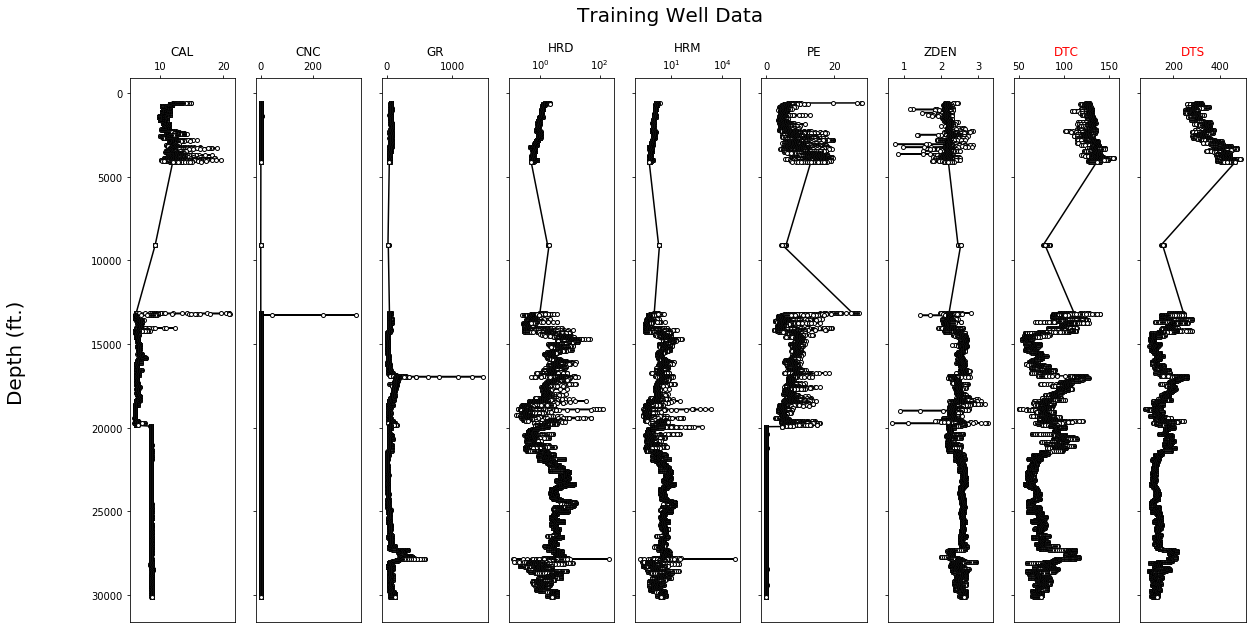

In [120]:
well_plot_fig = plot_well_curves(df_w1, curves)
plt.show()

There is a gap in the data between approximately 5,000 ft and 14,000 ft.  There also appears to be some invalid data in the CNC data.

In [11]:
plt.rcParams["axes.labelsize"] = 20

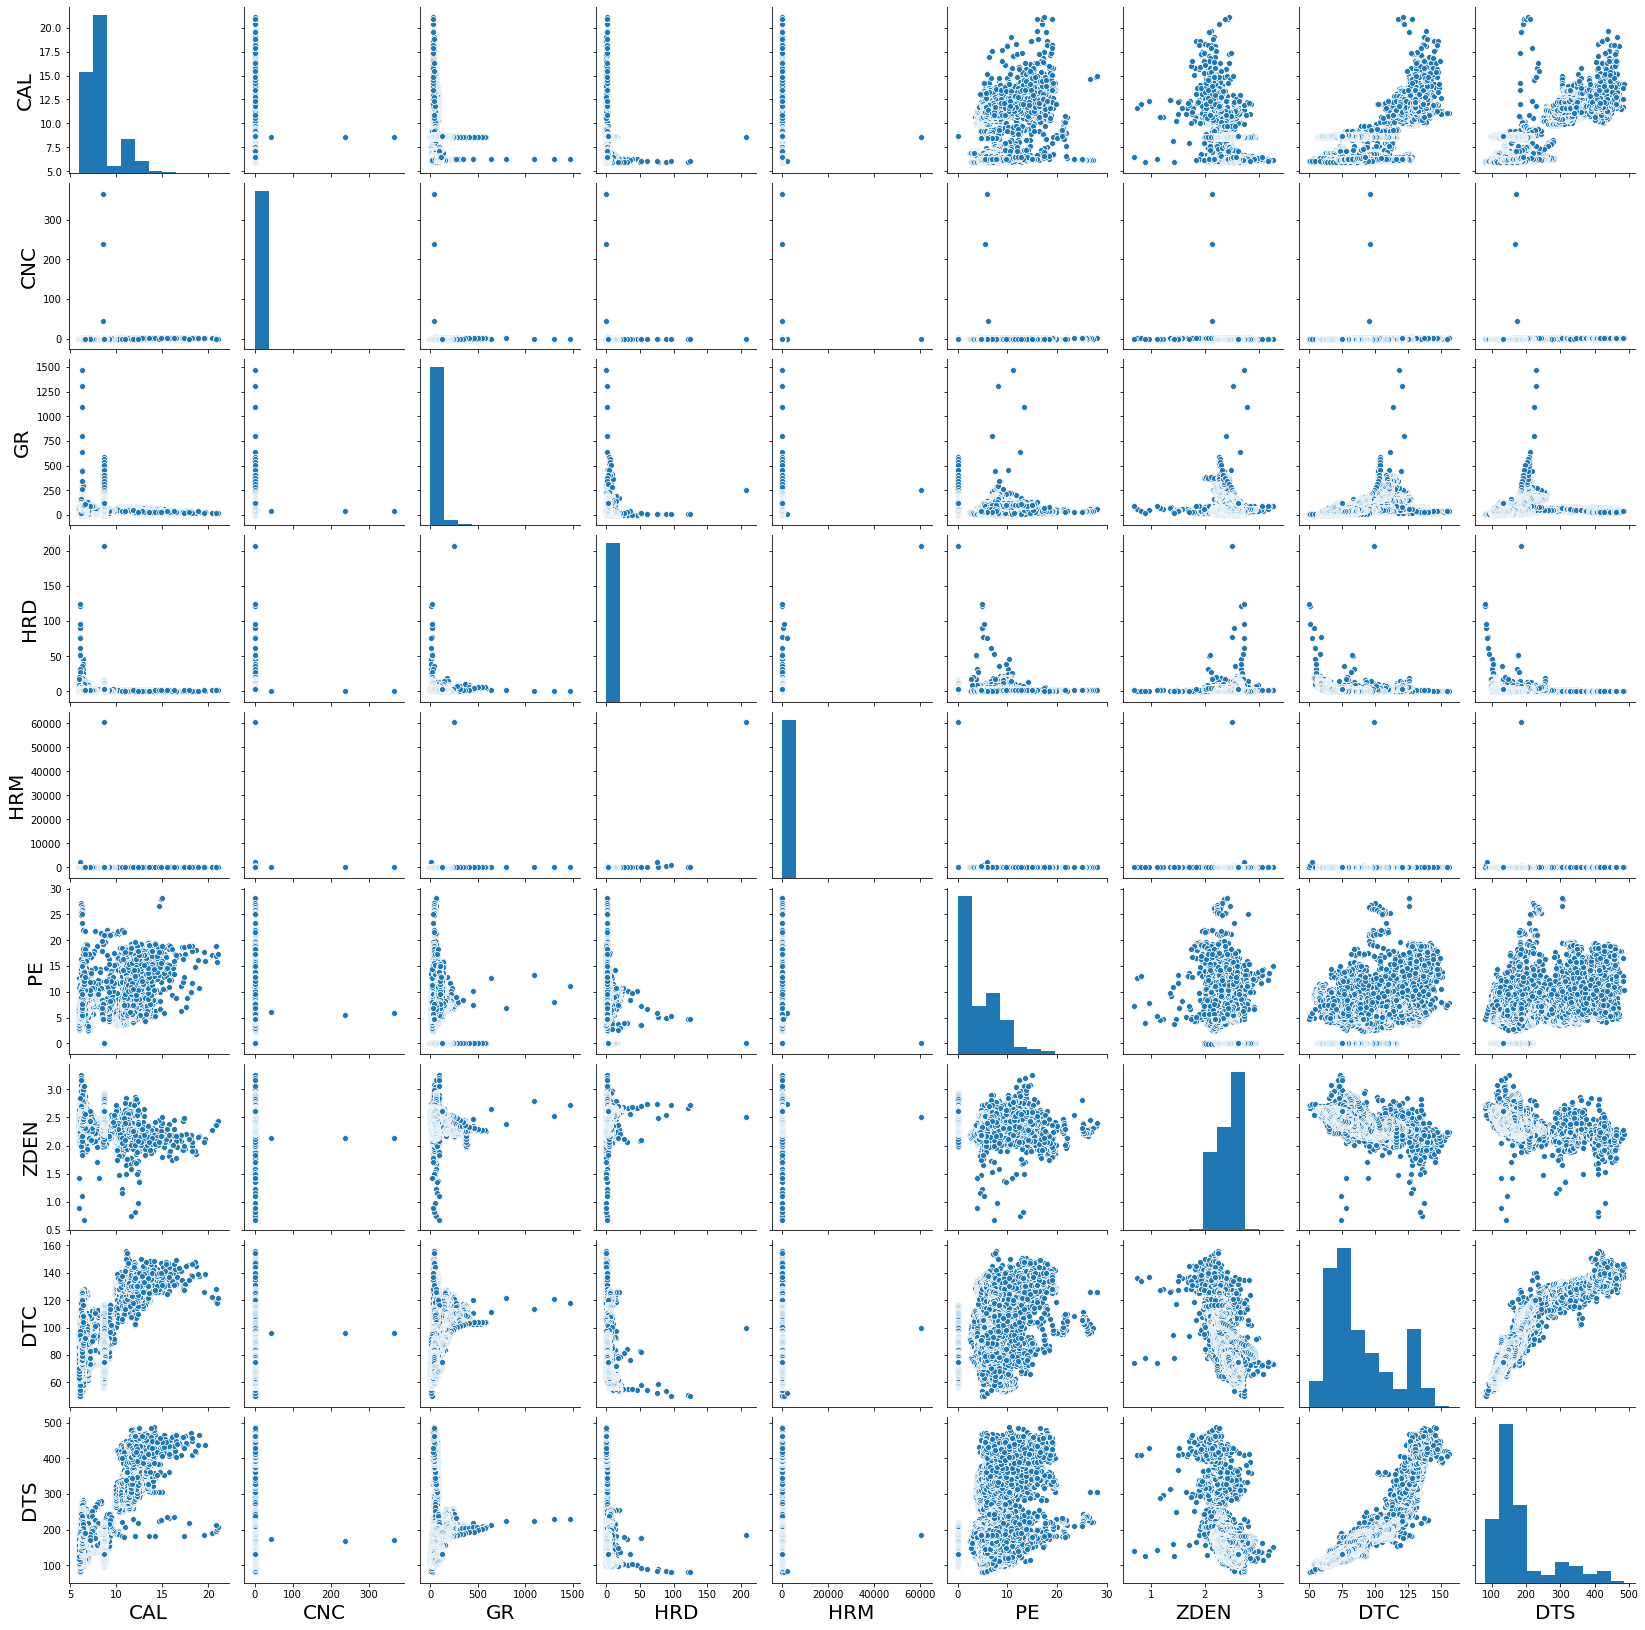

In [12]:
sns.pairplot(df_w1)
plt.show()

Upon initial inspection, it appears that there could be several outliers that may or may not be valid measurements.  They could pose a problem in establishing an accurate predictive model, so further cleaning may be required.

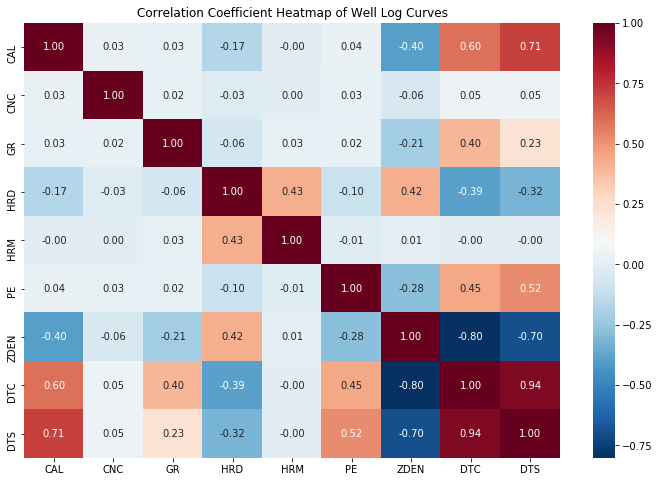

In [20]:
fig = plt.figure(figsize=(12,8))
ax = sns.heatmap(df_w1.corr(), cmap="RdBu_r", annot=True, fmt=".2f")
ax.set_title('Correlation Coefficient Heatmap of Well Log Curves')
plt.show()